# Predicting taxi fares
## What are the important features?

1. Distance (nuumerical)
2. Time of Day - Busy hour (categorical)
3. Travel time (numerical)
4. Time of the year (numerical)
5. Car Type (categorical)
6. Location of pickup/drop (categorical)
7. Toll taxes (numerical)

Can a mathematical equation solve this?- no, because they cannot incorporate with mixed or interconnected effects.

In [3]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import median

In [4]:
df=pd.read_csv('df_all.csv',low_memory=False) #data is too big approx 370mbs

In [5]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  airport_fee            float64
dtypes: float64(12), int64(5), object(3)
memory usage: 376.0+ MB


In [7]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.463931e+06,2.463931e+06,2.392428e+06,2.463931e+06,2.392428e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.392428e+06,2.392428e+06
mean,1.231965e+06,1.707819e+00,1.389453e+00,5.372751e+00,1.415507e+00,1.660768e+02,1.635807e+02,1.194449e+00,1.294648e+01,1.006710e+00,4.914539e-01,2.385696e+00,3.749773e-01,2.967234e-01,1.916937e+01,2.282322e+00,8.249935e-02
std,7.112758e+05,5.021375e-01,9.829686e-01,5.478714e+02,5.917573e+00,6.546806e+01,7.079016e+01,5.001778e-01,2.558149e+02,1.236226e+00,8.291560e-02,2.830698e+00,1.680538e+00,4.374741e-02,2.559641e+02,7.432040e-01,3.125554e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-4.803000e+02,-2.500000e+00,-1.250000e+00
25%,6.159825e+05,1.000000e+00,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,7.200000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00
50%,1.231965e+06,2.000000e+00,1.000000e+00,1.740000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.469000e+01,2.500000e+00,0.000000e+00
75%,1.847948e+06,2.000000e+00,1.000000e+00,3.130000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.002000e+01,2.500000e+00,0.000000e+00
max,2.463930e+06,6.000000e+00,9.000000e+00,3.061593e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.659000e+01,8.888800e+02,1.933000e+02,3.000000e-01,4.010956e+05,2.500000e+00,1.250000e+00


In [8]:
from pandas_profiling import ProfileReport

In [9]:
df.shape

(2463931, 20)

In [10]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [11]:
df.shape

(2463931, 19)

In [12]:
df['VendorID']

0          1
1          1
2          2
3          2
4          2
          ..
2463926    2
2463927    2
2463928    2
2463929    2
2463930    2
Name: VendorID, Length: 2463931, dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,2463931.0,1.707819,0.502137,1.00,1.00,2.00,2.00,6.00
passenger_count,2392428.0,1.389453,0.982969,0.00,1.00,1.00,1.00,9.00
trip_distance,2463931.0,5.372751,547.871404,0.00,1.04,1.74,3.13,306159.28
RatecodeID,2392428.0,1.415507,5.917573,1.00,1.00,1.00,1.00,99.00
PULocationID,2463931.0,166.076809,65.468057,1.00,132.00,162.00,234.00,265.00
DOLocationID,2463931.0,163.580716,70.790159,1.00,113.00,162.00,236.00,265.00
payment_type,2463931.0,1.194449,0.500178,0.00,1.00,1.00,1.00,5.00
fare_amount,2463931.0,12.946484,255.814887,-480.00,6.50,9.00,14.00,401092.32
extra,2463931.0,1.006710,1.236226,-4.50,0.00,0.50,2.50,33.50
mta_tax,2463931.0,0.491454,0.082916,-0.50,0.50,0.50,0.50,16.59


In [14]:
print(df.duplicated().value_counts())
df.drop_duplicates(inplace=True)
print(len(df))

False    2463931
dtype: int64
2463931


In [15]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71503
trip_distance                0
RatecodeID               71503
store_and_fwd_flag       71503
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71503
airport_fee              71503
dtype: int64

In [16]:
df[df.isna().any(axis=1)][["passenger_count","RatecodeID","store_and_fwd_flag","congestion_surcharge","airport_fee"]]

,passenger_count,RatecodeID,store_and_fwd_flag,congestion_surcharge,airport_fee
2392428,NaN,NaN,NaN,NaN,NaN
2392429,NaN,NaN,NaN,NaN,NaN
2392430,NaN,NaN,NaN,NaN,NaN
2392431,NaN,NaN,NaN,NaN,NaN
2392432,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2463926,NaN,NaN,NaN,NaN,NaN
2463927,NaN,NaN,NaN,NaN,NaN
2463928,NaN,NaN,NaN,NaN,NaN
2463929,NaN,NaN,NaN,NaN,NaN


In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

# EDA

In [19]:
profile = ProfileReport(df,title="Profile Report",minimal=True,progress_bar=False)
profile.to_notebook_iframe()

In [20]:
df.head(2).T

,0,1
VendorID,1,1
tpep_pickup_datetime,2022-01-01 00:35:40,2022-01-01 00:33:43
tpep_dropoff_datetime,2022-01-01 00:53:29,2022-01-01 00:42:07
passenger_count,2.0,1.0
trip_distance,3.8,2.1
RatecodeID,1.0,1.0
store_and_fwd_flag,N,N
PULocationID,142,236
DOLocationID,236,42
payment_type,1,1


In [21]:
df=df[(df["passenger_count"]>=1) & (df["passenger_count"]<7)]
df=df[(df["fare_amount"]>0) & (df["fare_amount"]<50000)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\AppData\Local\Temp\ipykernel_5236\871394359.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


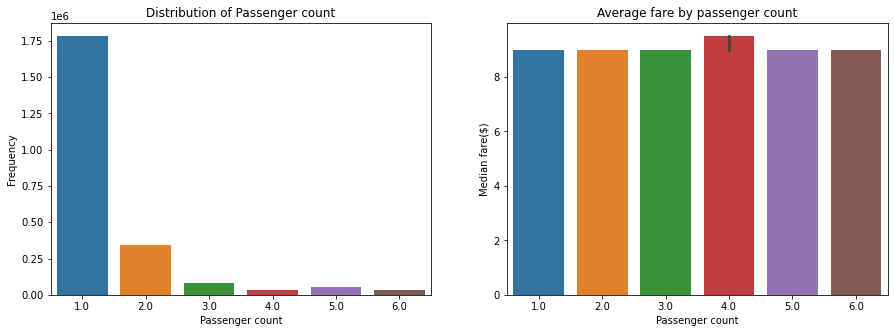

In [22]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(df.passenger_count, ax=ax[0])
ax[0].set_xlabel("Passenger count")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Passenger count")
sns.barplot(data=df,x="passenger_count",y="fare_amount",estimator=median)
ax[1].set_xlabel("Passenger count")
ax[1].set_ylabel("Median fare($)")
ax[1].set_title("Average fare by passenger count")
fig.show()

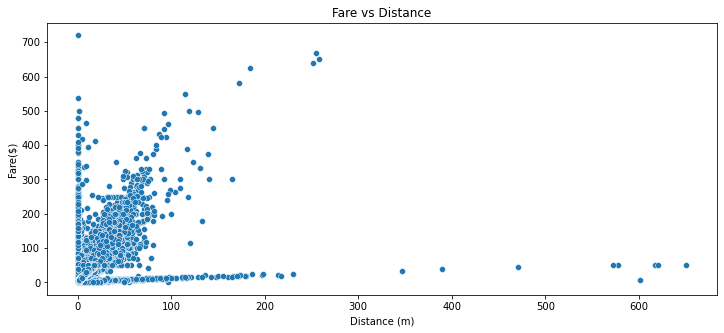

In [23]:
fig = plt.figure(figsize=(12,5))
sns.scatterplot(x='trip_distance', y='fare_amount',data=df).set_title('Fare vs Distance')
plt.xlabel('Distance (m)')
plt.ylabel('Fare($)')
plt.show()

In [24]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
df["year"] = df.tpep_pickup_datetime.dt.year
df["weekday"]= df.tpep_pickup_datetime.dt.dayofweek
df["time"]=(df.tpep_pickup_datetime.dt.hour)

Text(0.5, 1.0, 'Fair paid by time of day')

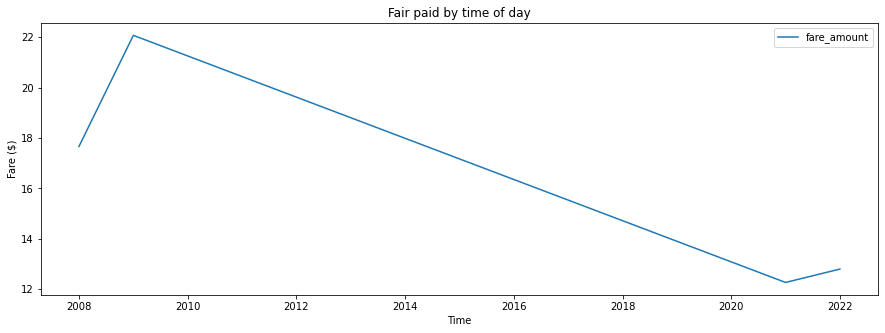

In [25]:
df.pivot_table('fare_amount',index='year').plot(figsize=(15,5))
plt.ylabel('Fare ($)')
plt.xlabel('Time')
plt.title('Fair paid by time of day')


In [26]:
df.head(2).T

,0,1
VendorID,1,1
tpep_pickup_datetime,2022-01-01 00:35:40,2022-01-01 00:33:43
tpep_dropoff_datetime,2022-01-01 00:53:29,2022-01-01 00:42:07
passenger_count,2.0,1.0
trip_distance,3.8,2.1
RatecodeID,1.0,1.0
store_and_fwd_flag,N,N
PULocationID,142,236
DOLocationID,236,42
payment_type,1,1


In [27]:
df=df[df["year"]>2020]

Text(0.5, 1.0, 'Fair paid by Year')

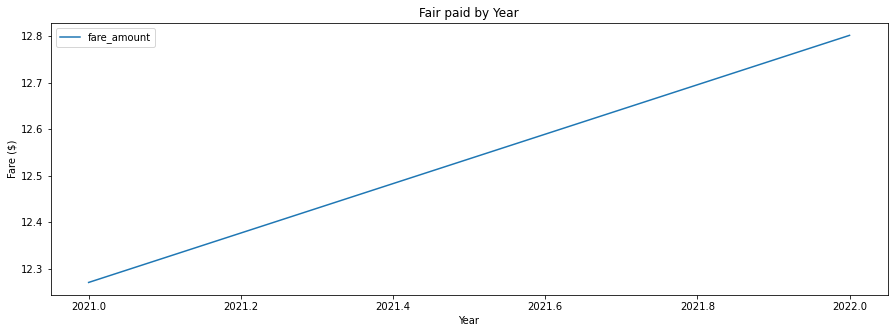

In [28]:
df.pivot_table('fare_amount',index='year').plot(figsize=(15,5))
plt.ylabel('Fare ($)')
plt.xlabel('Year')
plt.title('Fair paid by Year')

Text(0.5, 1.0, 'Fair paid by Weekdays')

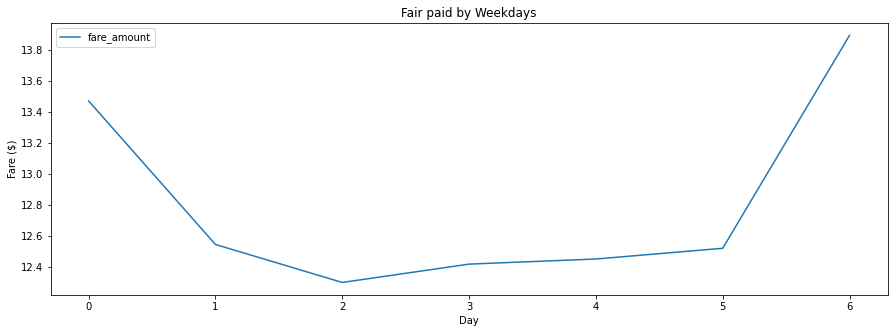

In [29]:
df.pivot_table('fare_amount',index='weekday').plot(figsize=(15,5))
plt.ylabel('Fare ($)')
plt.xlabel('Day')
plt.title('Fair paid by Weekdays')

Text(0.5, 1.0, 'Fair paid by time')

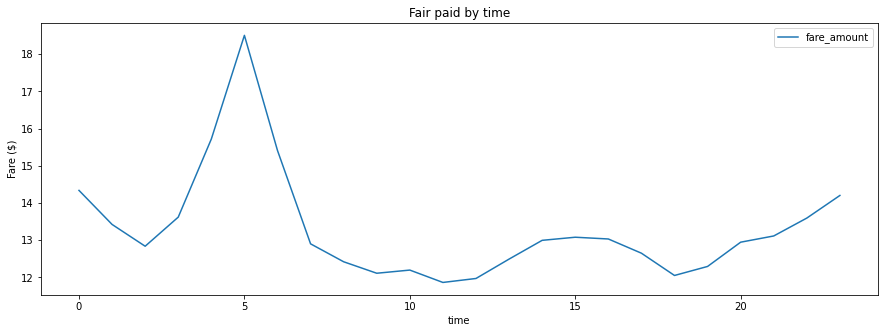

In [30]:
df.pivot_table('fare_amount',index='time').plot(figsize=(15,5))
plt.ylabel('Fare ($)')
plt.xlabel('time')
plt.title('Fair paid by time')

Text(0.5, 1.0, 'Trip distance vs Time of Day')

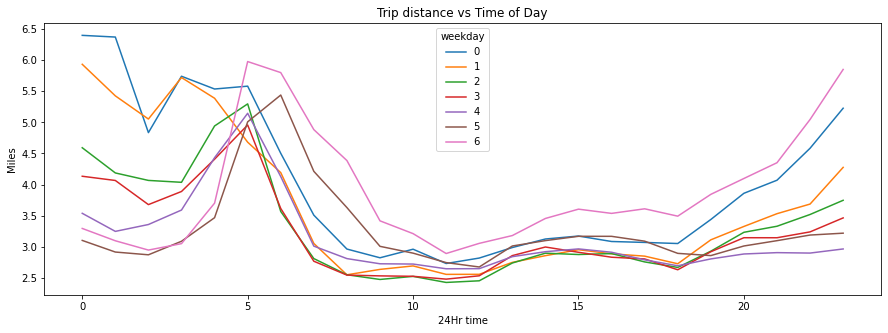

In [31]:
df.pivot_table('trip_distance',index='time',columns='weekday').plot(figsize=(15,5))
plt.ylabel('Miles')
plt.xlabel('24Hr time')
plt.title('Trip distance vs Time of Day')

In [32]:
df['store_and_fwd_flag']=df["store_and_fwd_flag"].map({"Y":0,"N":1})

In [33]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,year,weekday,time
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,1,142,236,1,...,0.5,3.65,0.0,0.3,21.95,2.5,0.0,2022,5,0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,1,236,42,1,...,0.5,4.00,0.0,0.3,13.30,0.0,0.0,2022,5,0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,1,166,166,1,...,0.5,1.76,0.0,0.3,10.56,0.0,0.0,2022,5,0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,1,114,68,2,...,0.5,0.00,0.0,0.3,11.80,2.5,0.0,2022,5,0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,1,68,163,1,...,0.5,3.00,0.0,0.3,30.30,2.5,0.0,2022,5,0


# Model

In [34]:
Y=df['fare_amount'].values
X= df.drop(columns=['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','year','fare_amount','extra','tip_amount','tolls_amount','total_amount','mta_tax'])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=22)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1628581, 12)
(697964, 12)
(1628581,)
(697964,)


In [38]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [39]:
from sklearn.linear_model import LinearRegression 

logreg = LinearRegression()
logreg.fit(X_train,Y_train)
print(logreg)
prediction = logreg.predict(X_test)
print('Model Accuracy:','{:.2f}%'.format(100*logreg.score(X_test,Y_test)))
print('R square value:','{:.2f}%'.format(100*r2_score(Y_test,prediction)))
print('Mean Absolute Error Accuracy:',mean_absolute_error(Y_test,prediction))
print('Root Mean Squared Error Accuracy:',np.sqrt(mean_squared_error(Y_test,prediction)))

LinearRegression()
Model Accuracy: 73.66%
R square value: 73.66%
Mean Absolute Error Accuracy: 2.2018807574583663
Root Mean Squared Error Accuracy: 6.260227023801639


In [40]:
print('The value of slope is:',logreg.coef_)
print('The value of intercept is:',logreg.intercept_)

The value of slope is: [ 7.42792389e-02  2.26816778e+00  1.38086964e-01 -1.41590187e-02
  2.79292498e-04  3.08750683e-07 -3.05205186e-01 -1.18318370e+02
 -1.60224747e+00  1.29204387e+00 -1.23313069e-02 -1.57246148e-02]
The value of intercept is: 45.111660123846036


In [41]:
TestingDataResults=pd.DataFrame(data=X_test,columns=X.columns)
TestingDataResults["fare_amount"]=Y_test
TestingDataResults[('Predicted_fare_amount')]=np.round(prediction,4)
TestingDataResults[["fare_amount","Predicted_fare_amount"]].head(10)

,fare_amount,Predicted_fare_amount
1938813,12.5,9.9311
1344417,11.5,9.5681
2310644,52.0,49.4588
358911,7.5,9.6721
1282197,5.5,6.3250
1206703,13.5,12.7544
865498,23.0,22.2861
116658,10.5,11.1838
1276799,22.5,17.0104
2116245,17.5,16.5709
